In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
#read the test and train files and view
traindf= pd.read_csv("train_PDjVQMB.csv")

In [5]:
testdf= pd.read_csv("test_lTY72QC.csv")

In [6]:
traindf.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L-10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [7]:
testdf.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


#Exploratory Analysis of the Train dataset

In [9]:
traindf.info()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -----------

In [63]:
testdf.describe()
traindf.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,2851.000000,2.851000e+03,2851.000000,2851.000000,2851.000000
mean,41.252192,8.098990e+05,2.220975,0.506840,0.668888
std,9.616756,5.252003e+05,1.489941,0.500041,0.470696
min,21.000000,1.503000e+03,0.000000,0.000000,0.000000
25%,34.000000,4.009684e+05,1.000000,0.000000,0.000000
50%,40.000000,7.659125e+05,2.000000,1.000000,1.000000
75%,47.000000,1.154238e+06,3.000000,1.000000,1.000000
max,72.000000,2.434834e+06,5.000000,1.000000,1.000000


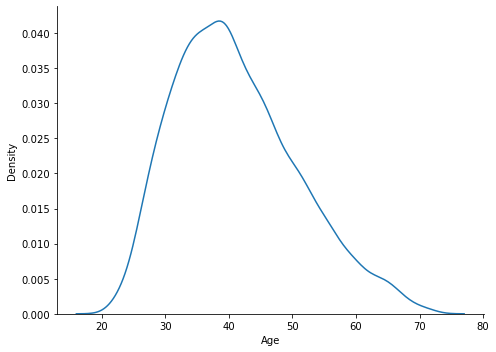

In [11]:
#to visualize the spread of the data in the Age column
sns.displot(
  data=traindf,
  x="Age",
  kind="kde",
  aspect=1.4)

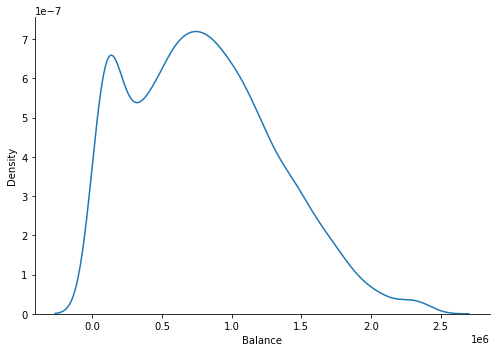

In [12]:
sns.displot(
  data=traindf,
  x="Balance",
  kind="kde",
  aspect=1.4)

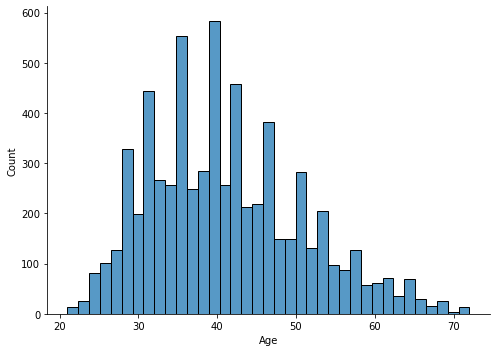

In [13]:
sns.displot(
  data=traindf,
  x="Age",
  kind="hist",
  aspect=1.4)

#Data Preposessing and further exploration

In [15]:
traindf['Age_Category'] =['GenX' if 19<age<30 else 'yongstar' if 29<age<40 else 'BabyBoomers'
                        if 39<age<50 else 'Genold' if 49<age<100 else None
                        for age in list(traindf['Age'].values)]

In [64]:
testdf['Age_Category'] =['GenX' if 19<age<30 else 'yongstar' if 29<age<40 else 'BabyBoomers'
                        if 39<age<50 else 'Genold' if 49<age<100 else None
                        for age in list(testdf['Age'].values)]

In [17]:
traindf['Age_Category'].value_counts()
traindf['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

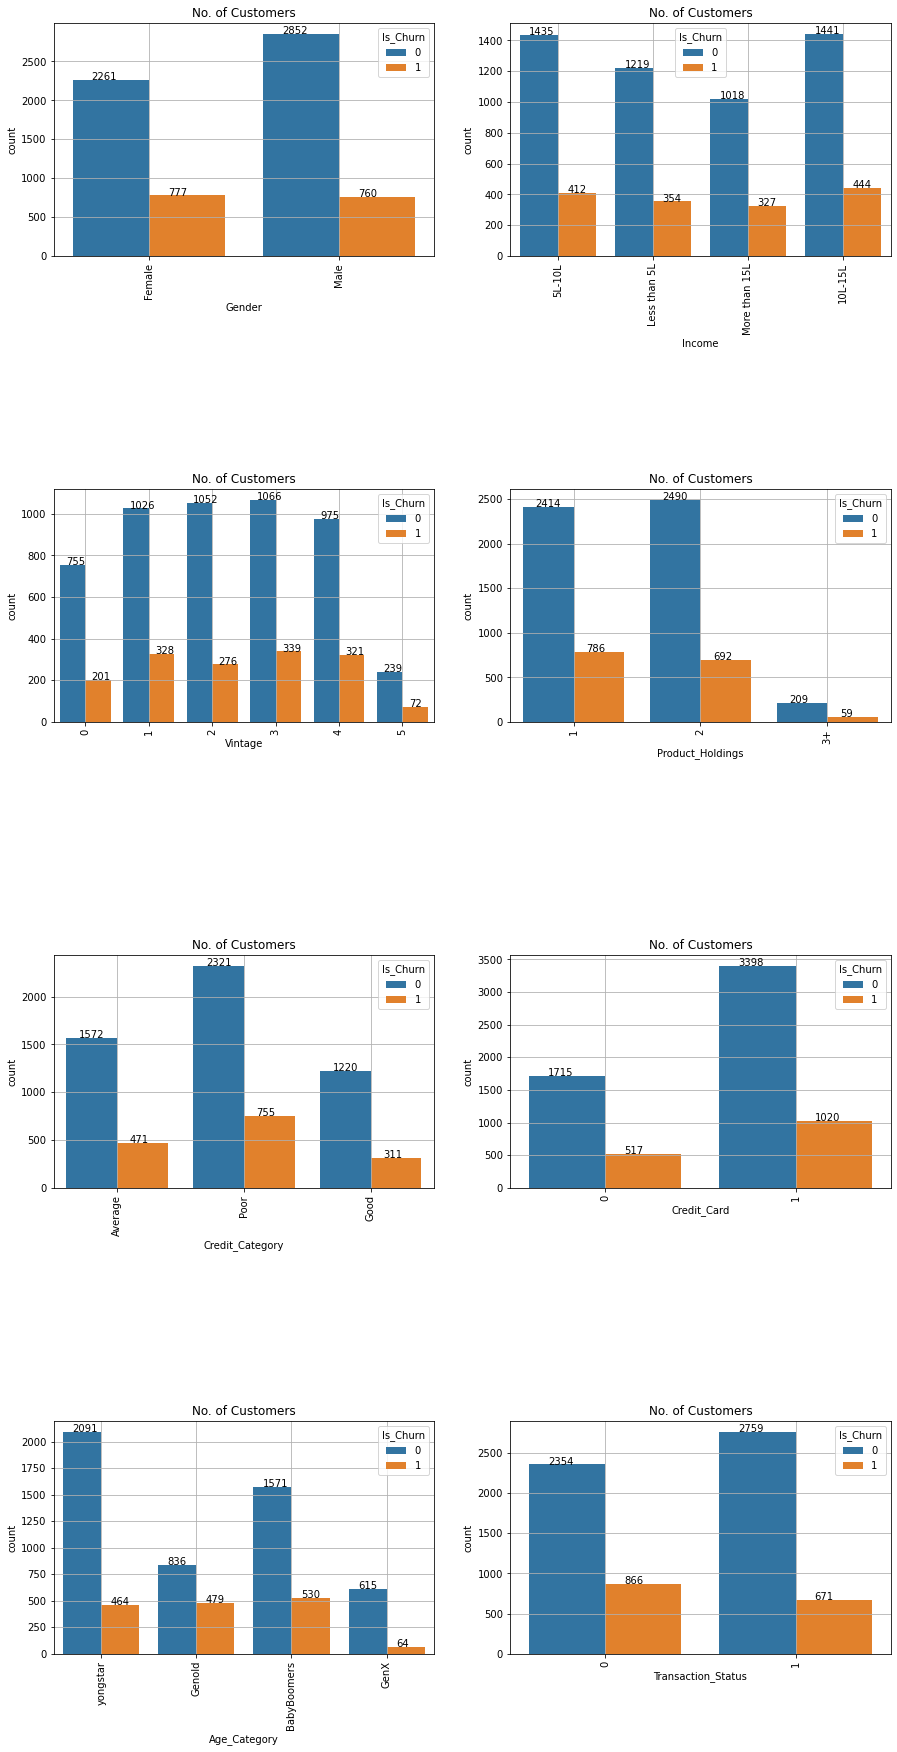

In [16]:
features=['Gender','Income','Vintage','Product_Holdings','Credit_Category','Credit_Card','Age_Category','Transaction_Status']
fig=plt.subplots(figsize=(15,30))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax=sns.countplot(x=j,data = traindf, hue='Is_Churn')
    plt.xticks(rotation=90)
    plt.grid()
    plt.title("No. of Customers")
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))

#data enconding of the categorial data

In [20]:
encoder=LabelEncoder() 
traindf.Gender=encoder.fit_transform(traindf.Gender) 
traindf.Product_Holdings=encoder.fit_transform(traindf.Product_Holdings)

In [65]:
encoder=LabelEncoder() 
testdf.Gender=encoder.fit_transform(testdf.Gender) 
testdf.Product_Holdings=encoder.fit_transform(testdf.Product_Holdings)

In [21]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(traindf[['Income']]).toarray())
traindf = traindf.join(enc_df)

In [22]:
traindf.rename({0: '10L-15L', 1: '5L-10L', 2:'Less than 5L', 3:'More than 15L'}, axis=1, inplace=True)

In [66]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(testdf[['Income']]).toarray())
testdf = testdf.join(enc_df)

In [67]:
testdf.rename({0: '10L-15L', 1: '5L-10L', 2:'Less than 5L', 3:'More than 15L'}, axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(traindf[['Age_Category']]).toarray())
traindf = traindf.join(enc_df)

In [24]:
traindf.rename({0: 'BabyBoomers', 1: 'GenX', 2:'Genold', 3:'yongstar'}, axis=1, inplace=True)

In [68]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(testdf[['Age_Category']]).toarray())
testdf = testdf.join(enc_df)

In [69]:
testdf.rename({0: 'BabyBoomers', 1: 'GenX', 2:'Genold', 3:'yongstar'}, axis=1, inplace=True)

In [25]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(traindf[['Credit_Category']]).toarray())
traindf = traindf.join(enc_df)

In [26]:
traindf.rename({0: 'Average', 1: 'Good', 2:'Poor'}, axis=1, inplace=True)

In [70]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore') 
enc_df = pd.DataFrame(enc.fit_transform(testdf[['Credit_Category']]).toarray())
testdf = testdf.join(enc_df)

In [71]:
testdf.rename({0: 'Average', 1: 'Good', 2:'Poor'}, axis=1, inplace=True)

In [27]:
traindf.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,...,5L-10L,Less than 5L,More than 15L,BabyBoomers,GenX,Genold,yongstar,Average,Good,Poor
0,84e2fcc9,36,0,5L-10L,563266.44,4,0,0,0,Average,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,57fea15e,53,0,Less than 5L,875572.11,2,1,0,1,Poor,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,8df34ef3,35,0,More than 15L,701607.06,2,1,1,0,Poor,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,c5c0788b,43,0,More than 15L,1393922.16,0,1,1,1,Poor,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,951d69c4,39,0,More than 15L,893146.23,1,1,0,1,Good,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#splitting the train dataset for model preparation

In [29]:
y= traindf["Is_Churn"]
x= traindf.drop(["Is_Churn",'Income','Age_Category','Credit_Category','ID'], axis=1)

In [74]:
testdf=testdf.drop(['Income','Age_Category','Credit_Category','ID'], axis=1)

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#Grid search for hyper parameter tuning

In [32]:
%%capture
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
}

In [38]:
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)

result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Tammy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.46484336        nan 0.46484336        nan 0.46484336
        nan 0.46484336        nan 0.46484336        nan 0.46484336
        nan 0.46484336        nan 0.46484336        nan 0.46484336
        nan 0.46484336]
  warnings.warn(


In [40]:
#getting the best parameters for logistic regression
grid.best_params_

{'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}

In [42]:
#building the model using Logistic regression Algorithm
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(fit_intercept= True, penalty= 'l2',random_state = 1) 
classifier.fit(x_train, y_train) 
pred = classifier.predict(x_test)

In [41]:
#F1 test for Logistic regression
from sklearn.metrics import f1_score
print(f1_score(y_test,pred, average='macro'))

0.4340425531914894


In [43]:
#building the model using Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

predict = model.predict(x_test)

In [44]:
#F1 test for Decision Tree
print(f1_score(y_test,predict, average='macro'))

0.511800589898212


In [45]:
#Checking for feature Importance using Random forest 
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators = 100,random_state = 42)
random_forest.fit(x_train, y_train)
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
Balance,0.317
Age,0.209
Vintage,0.129
Product_Holdings,0.051
Credit_Card,0.040
Gender,0.039
Transaction_Status,0.028
10L-15L,0.023
Less than 5L,0.022


In [46]:
#prediction using Random forest
predic= random_forest.predict(x_test)

In [47]:
#F1 test and evaluation report for Random Forest Classifier
print(f1_score(y_test,predic, average='macro'))

0.5252557170610678


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1530
           1       0.42      0.13      0.19       465

    accuracy                           0.76      1995
   macro avg       0.60      0.54      0.53      1995
weighted avg       0.70      0.76      0.70      1995



In [50]:
#building of model using SVC Algorithm
linear_svc = LinearSVC(fit_intercept= False, penalty= 'l2') 
linear_svc.fit(x_train, y_train) 
predicted = linear_svc.predict(x_test)

C:\Users\Tammy\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [51]:
#F1 test for SVC Algorithm
print(f1_score(y_test,predicted, average='macro'))

0.4340425531914894


In [52]:
#Standadizing the dataset for better model performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
testdf = sc.fit_transform(testdf)

In [53]:
#building of model using Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)

GaussianNB()

In [54]:
y_pred  =  nbclassifier.predict(x_test)

In [55]:
#F1 test and evaluation for Naive Bayes
print(f1_score(y_test,y_pred, average='macro'))

0.5776946013950949


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1530
           1       0.36      0.34      0.35       465

    accuracy                           0.70      1995
   macro avg       0.58      0.58      0.58      1995
weighted avg       0.70      0.70      0.70      1995



In [58]:
#building of model using xgboost
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[18:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
#F1 test and evaluation for xgboost
print(f1_score(y_test,preds, average='macro'))

0.503451871936594


In [60]:
#confusiom matrix to visualize model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1247,  283],
       [ 308,  157]], dtype=int64)

#Prediction using the test data

In [77]:
submission_file=pd.read_csv('sample_OoSmYo5.csv')

In [79]:
submission_file["Is_Churn"] =nbclassifier.predict(testdf)

In [80]:
#1st submission file 
submission_file.to_csv('ibitamuno_submission.csv',index=False) 

In [81]:
submission_file["Is_Churn"] =random_forest.predict(testdf)

In [82]:
#2nd submission file 
submission_file.to_csv('ibitamuno2_submission.csv',index=False) 

In [83]:
submission_file["Is_Churn"] =xg_reg.predict(testdf)

In [84]:
#3rd submission file 
submission_file.to_csv('ibitamuno3_submission.csv',index=False) 

In [89]:
#model building using extar trees classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train,y_train)
predo = clf.predict(x_test)

In [90]:
#F1 test and evaluation for extra trees classifier
print(f1_score(y_test,predo, average='macro'))

0.5266483854842098


In [91]:
submission_file["Is_Churn"] =clf.predict(testdf)

In [92]:
#4th submission file 
submission_file.to_csv('ibitamuno4_submission.csv',index=False) 

In [93]:
#model building using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

Prediv= gbc.predict(x_test)

In [94]:
submission_file["Is_Churn"] =gbc.predict(testdf)

In [95]:
#5th submission file 
submission_file.to_csv('ibitamuno5_submission.csv',index=False) 

In [96]:
submission_file["Is_Churn"] =model.predict(testdf)

In [97]:
#6th submission file 
submission_file.to_csv('ibitamuno6_submission.csv',index=False) 